In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

citydata = pd.merge(ride_data, city_data, on="city", how="left")
citydata.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
fare_avg = ride_data.groupby("city")["fare"].mean()
fare_avg = pd.DataFrame(fare_avg)
fare_avg.rename(columns={"fare":"avg_fare"}, inplace=True)

ride_freq = ride_data.groupby("city")["ride_id"].count()
ride_freq = pd.DataFrame(ride_freq)
ride_freq.rename(columns={"ride_id":"total_ride"}, inplace=True)

city_data2 = pd.merge(city_data, fare_avg, on="city", how="left")
city_data2 = pd.merge(city_data2, ride_freq, on="city", how="left")
city_data2.sort_values("city")

city_data2.head()

,city,driver_count,type,avg_fare,total_ride
0,Richardfort,38,Urban,22.373214,28
1,Williamsstad,59,Urban,24.362174,23
2,Port Angela,67,Urban,23.836842,19
3,Rodneyfort,34,Urban,28.616957,23
4,West Robert,39,Urban,25.123871,31


## Bubble Plot of Ride Sharing Data

In [3]:
# Obtain the x and y coordinates for each of the three city types
x_limit = city_data2["total_ride"].max()
#x_limit
x_axis = np.arange(0, x_limit, 5)
#x_axis

In [4]:
y_limit = city_data2["avg_fare"].max()
#y_limit
y_axis = np.arange(0, y_limit, 5)
#y_axis

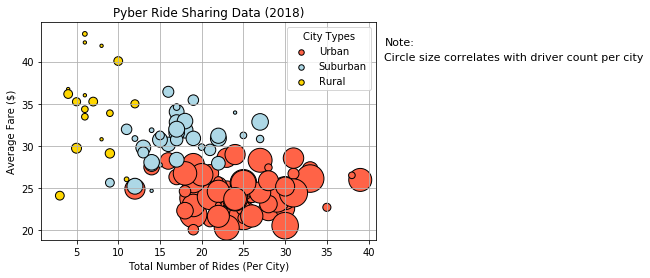

In [5]:
# Build the scatter plots for each city types
x = city_data2["total_ride"][(city_data2["type"]=="Urban")]
y = city_data2["avg_fare"][(city_data2["type"]=="Urban")]
z = city_data2["driver_count"][(city_data2["type"]=="Urban")]
#plt.plot(x, y, 'ro', s=x, label='Urban')
plt.scatter(x,y, marker="o",   facecolors="tomato", edgecolors="black", s=z*11, alpha=1)        
            
x = city_data2["total_ride"][(city_data2["type"]=="Suburban")]
y = city_data2["avg_fare"][(city_data2["type"]=="Suburban")]
z = city_data2["driver_count"][(city_data2["type"]=="Suburban")]
#plt.plot(x,y, 'bo', label='Suburban')
plt.scatter(x,y, marker="o",   facecolors="lightblue", edgecolors="black", s=z*11, alpha=1)

x = city_data2["total_ride"][(city_data2["type"]=="Rural")]
y = city_data2["avg_fare"][(city_data2["type"]=="Rural")]
z = city_data2["driver_count"][(city_data2["type"]=="Rural")]
#plt.plot(x, y, 'yo', label='Rural')
plt.scatter(x,y, marker="o",   facecolors="gold", edgecolors="black", s=z*11, alpha=1)

plt.grid()

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
list = ["Urban", "Suburban", "Rural"]

# Create a legend
lgnd = plt.legend(list,title="City Types", loc="best")

# Incorporate a text label regarding circle size
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Note
plt.gcf().text(0.92, 0.8, "Note:", fontsize=11)
plt.gcf().text(0.92, 0.75, "Circle size correlates with driver count per city", fontsize=11)

# Save Figure
plt.savefig("Ride_Sharing.png")

# Show plot
plt.show()

## Total Fares by City Type

In [6]:
# Calculate Type Percents
type_data = pd.merge(ride_data, city_data, on="city", how="left")
type_data.head()
#total = type_data.groupby("type")["fare"].sum()
#total


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [7]:
# calculate
fare_total = type_data["fare"].sum()
ride_total = type_data["ride_id"].count()
driver_total = type_data["driver_count"].sum()

chart_data = pd.DataFrame({"fare_percentage": type_data.groupby("type")["fare"].sum()/fare_total*100,
                     "ride_percentage": type_data.groupby("type")["ride_id"].count()/ride_total*100,
                     "driver_percentage":type_data.groupby("type")["driver_count"].sum()/driver_total*100})
chart_data

,fare_percentage,ride_percentage,driver_percentage
type,,,
Rural,6.811493,5.263158,0.781557
Suburban,30.463872,26.315789,12.472893
Urban,62.724635,68.421053,86.745550


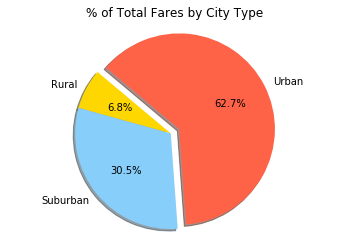

In [8]:
# Build Pie Chart
labels = ["Rural","Suburban", "Urban", ]
sizes = chart_data["fare_percentage"]
colors = ["gold","lightskyblue","tomato" ]
explode = (0, 0, 0.1)
plt.title('% of Total Fares by City Type')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")


# Save Figure
plt.savefig("Total_Fares.png")

In [9]:
# Show Figure
plt.show()

## Total Rides by City Type

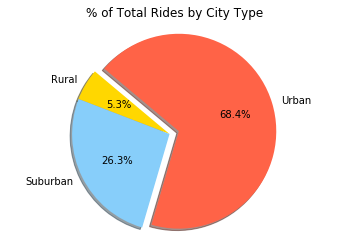

In [10]:
# Calculate Ride Percents

# Build Pie Chart
labels = ["Rural","Suburban", "Urban", ]
sizes = chart_data["ride_percentage"]
colors = ["gold","lightskyblue","tomato" ]
explode = (0, 0, 0.1)
plt.title('% of Total Rides by City Type')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

# Save Figure
plt.savefig("Total_Rides.png")

In [11]:
# Show Figure
plt.show()

## Total Drivers by City Type

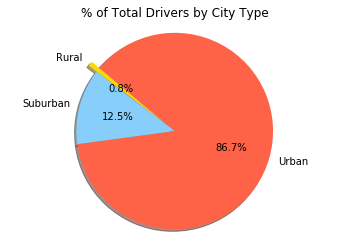

In [12]:
# Calculate Driver Percents

# Build Pie Charts
labels = ["Rural","Suburban", "Urban", ]
sizes = chart_data["driver_percentage"]
colors = ["gold","lightskyblue","tomato" ]
explode = (0.1, 0, 0)
plt.title('% of Total Drivers by City Type')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

# Save Figure
plt.savefig("Total_Driver.png")

In [13]:
# Show Figure
plt.show()